# Module2 Project Submission

Student name: Alice Kwon
<br>Student pace: part time
<br>Instructor name: Eli Thomas

## Organization:
- We clean the data 
- Make some observations
- Make linear regression model

Data set column names:

- id: unique identified for a house
- dateDate: house was sold
- pricePrice: is prediction target
- bedroomsNumber: of Bedrooms/House
- bathroomsNumber: of bathrooms/bedrooms
- sqft_livingsquare: footage of the home
- sqft_lotsquare: footage of the lot
- floorsTotal: floors (levels) in house
- waterfront: House which has a view to a waterfront
- view: Has been viewed
- condition: How good the condition is ( Overall )
- grade: overall grade given to the housing unit, based on King County grading system
- sqft_above: square footage of house apart from basement
- sqft_basement: square footage of the basement
- yr_built: Built Year
- yr_renovated: Year when house was renovated
- zipcode: zip
- lat: Latitude coordinate
- long: Longitude coordinate
- sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15: The square footage of the land lots of the nearest 15 neighbors

<br>Note: For the purposes of this project, flatiron has modified this data which means the result seen may be different from the results that one gets getting the data straight from kaggle.


In [89]:
import pandas as pd

In [107]:
df = pd.read_csv('kc_house_data copy.csv')

In [91]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [108]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

## Cleaning

In [109]:
df.date = pd.to_datetime(df.date)

#### sqft_basement
There are '?' as values for sqft_basement, we calculate the mode and replace all '?' with the mode. We will see that the mode is 0, we assume this means there was no basement for these houses. We calculate exactly what percentage of sqft_basement is 0 and if it is greater than 50% we will fill '?' with 0.  

In [110]:
print('Mode of sqft_basement:', float(df.sqft_basement.mode()))

Mode of sqft_basement: 0.0


In [111]:
print('Percentage of houses with 0 basement:', round( sum(df.sqft_basement == '0.0') / len(df), 2 ) * 100, '%' )

Percentage of houses with 0 basement: 59.0 %


In [112]:
df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')

#### View
We check to see if there are any missing values. We will see that there are missing values for waterfront, view and yr_renovated.

In [113]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

View has only 63 missing values with the median. This is an insignificant number of missing values. We fill it with 0 since the majority of the values of View is 0.  

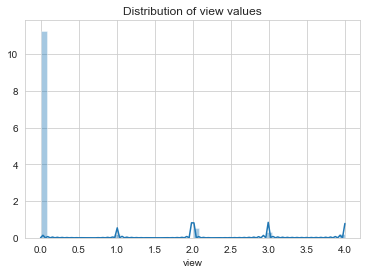

In [114]:
sns.distplot( df[df.view.notna()]['view'] )
plt.title('Distribution of view values')
plt.show()

In [115]:
df.view.fillna(0, inplace = True)
df.view = df.view.astype('int')

#### waterfront
If the house is near a waterfront then there would be a nonzero value for view for that house. Hence if the view is 0 then we take waterfront to be 0. If view is nonzero we will take waterfront to be 1. 

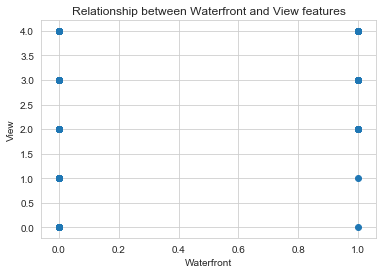

In [116]:
sns.set_style('whitegrid')

plt.scatter(df.waterfront, df.view)
plt.title('Relationship between Waterfront and View features')
plt.xlabel('Waterfront')
plt.ylabel('View')
plt.show()

In [117]:
df.waterfront.fillna(df.view, inplace = True)

In [121]:
def replaceToOne(value):
    if value >1:
        return 1
    else:
        return value

In [122]:
df.waterfront = df.waterfront.apply(lambda x: replaceToOne(x))

#### yr_renovated
For the yr_renovated, there is no way to tell which year a house had been renovated. We will see that most houses have not been renovated hence we assume that houses with missing renovation data has not been renovated. 

In [124]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [125]:
df['yr_renovated'].fillna(0, inplace = True)

## Multicolinearity

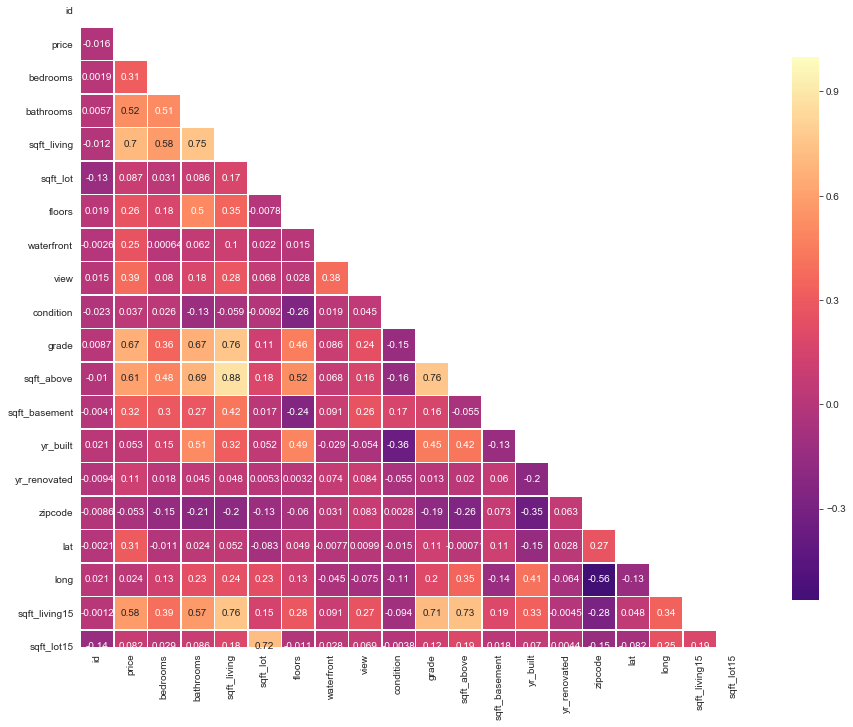

In [157]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 20))
sns.heatmap(df.corr(), mask=mask, cmap='magma', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});
plt.savefig('heatmap.png')

We see that sqft_above and sqft_living is a good indicator for price as they both have high correlations with price. However, they are both correlated so only one will do. Since sqft_living has higher correlation with price we drop sqft_above. 

In [126]:
df = df.drop('sqft_above', axis =1)

### Drop duplicates

In [45]:
df = df.drop_duplicates()

### Questions for business recommendation?
1. What makes a house value go up (renovation, location, size)?<br>
2. What is the best time to sell a house? <br>
3. What are improvements that can be made to a house (number of bathrooms, bedrooms)?

We begin by seeing if renovations help with price, i.e. if it increases our price.

In [20]:
df1 = df[df['yr_renovated']==0]

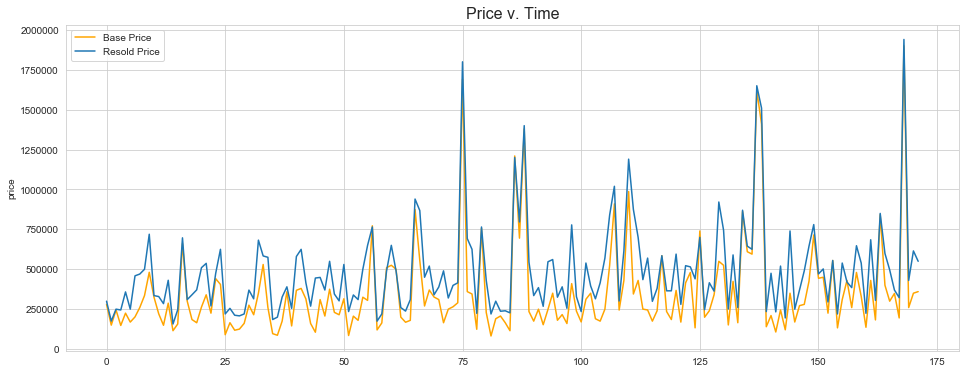

average increase in price: 28.11350094999433 %


In [21]:
dup = df1[df1.id.duplicated(keep=False)]
prices = dup.groupby('id')['price']

plt.figure(figsize=(16,6))
sns.lineplot( range(len(prices)), prices.first(), label='Base Price' , color ='orange')
sns.lineplot( range(len(prices)), prices.last(), label='Resold Price')
plt.title('Price v. Time', fontdict={'fontsize': 16})
plt.legend()
plt.savefig('NoRenovation.png')
plt.show()

print('average increase in price:',(1-( prices.first().mean()/prices.last().mean()))*100,'%') 

In [22]:
df2 = df[df['yr_renovated']>0]
dup = df2[df2.id.duplicated(keep=False)]
prices = dup.groupby('id')['price']

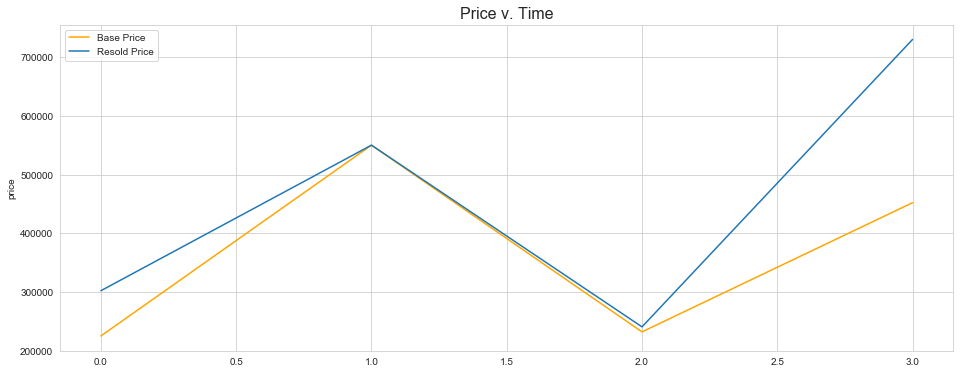

average increase in price: 19.94952265993636 %


In [23]:
plt.figure(figsize=(16,6))
sns.lineplot( range(len(prices)), prices.first(), label='Base Price' , color ='orange')
sns.lineplot( range(len(prices)), prices.last(), label='Resold Price')
plt.title('Price v. Time', fontdict={'fontsize': 16})
plt.legend()
plt.savefig('Renovation2.png')
plt.show()

print('average increase in price:',(1-( prices.first().mean()/prices.last().mean()))*100,'%') 

There doesn't seem to be much difference with renovation but theres just not enough data

We have a good correlation between sqft_living and price. Are there any other influences on price given the square footage of the house? 

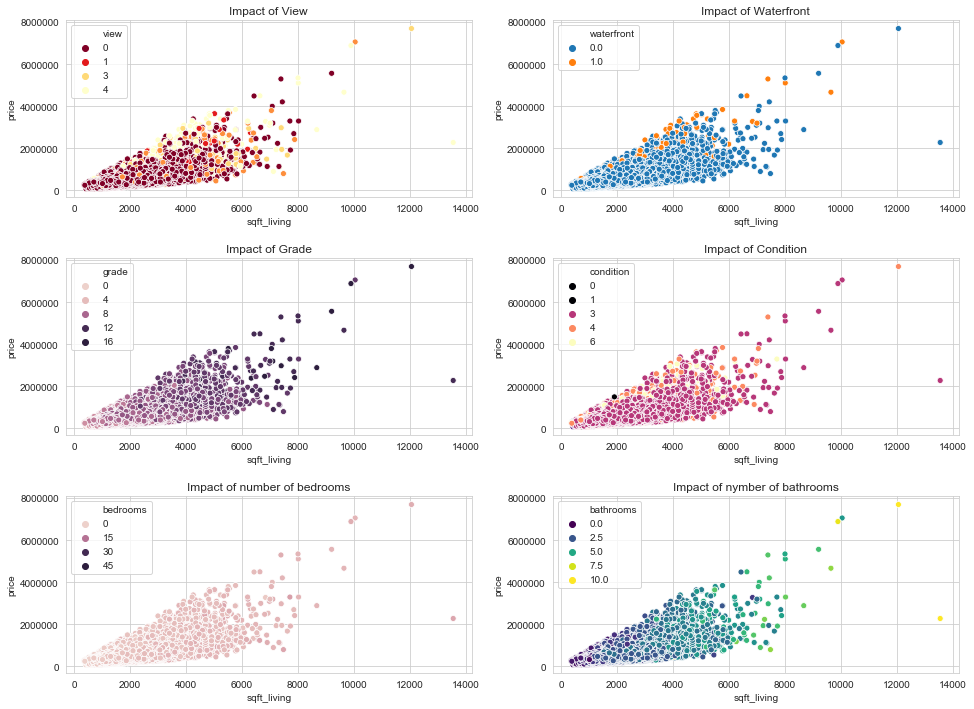

In [160]:
plt.figure(figsize=(16,12))

plt.subplot(321)
sns.scatterplot(df.sqft_living, df.price, hue=df.view, palette = 'YlOrRd_r')
plt.title('Impact of View')
plt.subplot(322)
sns.scatterplot(df.sqft_living, df.price, hue=df.waterfront)
plt.title('Impact of Waterfront')
plt.subplot(323)
sns.scatterplot(df.sqft_living, df.price, hue=df.grade)
plt.title('Impact of Grade')
plt.subplot(324)
sns.scatterplot(df.sqft_living, df.price, hue=df.condition, palette ='magma')
plt.title('Impact of Condition')
plt.subplot(325)
sns.scatterplot(df.sqft_living, df.price, hue=df.bedrooms)
plt.title('Impact of number of bedrooms')
plt.subplot(326)
sns.scatterplot(df.sqft_living, df.price, hue=df.bathrooms, palette='viridis')
plt.title('Impact of nymber of bathrooms')

plt.subplots_adjust(hspace=0.35)
plt.savefig('scatterplots1.png')
plt.show()

In [77]:
df['season'] = pd.DatetimeIndex(df['date']).month

In [78]:
dmap = { 1:'Winter', 2:'Winter' , 3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer', 8:'Summer', 9: 'Fall', 10:'Fall', 11: 'Fall', 12:'Winter'}
df['season'] = df['season'].map(dmap)

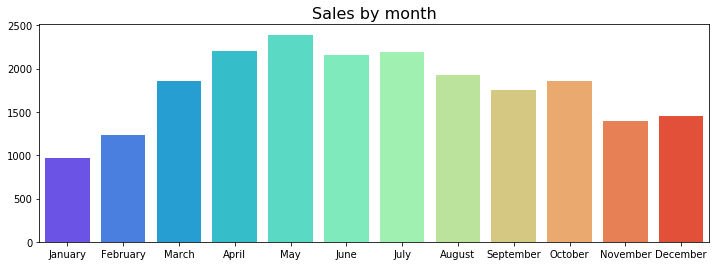

In [143]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(df.date.dt.month == i))
    
plt.figure(figsize=(12,4))
sns.barplot(months, monthly_sales, palette = 'rainbow')
plt.title('Sales by month', fontdict={'fontsize': 16})
plt.savefig('SalesMonth.png')
plt.show()

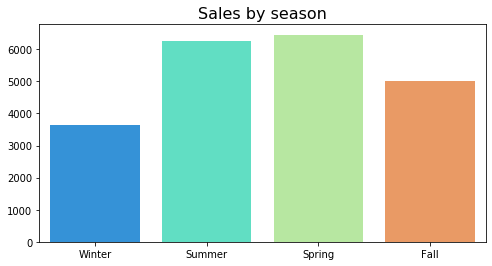

In [142]:
seasons = ['Winter', 'Summer', 'Spring', 'Fall']
seasonal_sales = []

for x in seasons:
    seasonal_sales.append(sum(df.season == x))

plt.figure(figsize=(8,4))
sns.barplot(seasons , seasonal_sales, palette= 'rainbow')
plt.title('Sales by season', fontdict={'fontsize': 16})
plt.savefig('SalesSeason.png')
plt.show()

We look at correlations between price and a few variables and see if they are good indicators for price

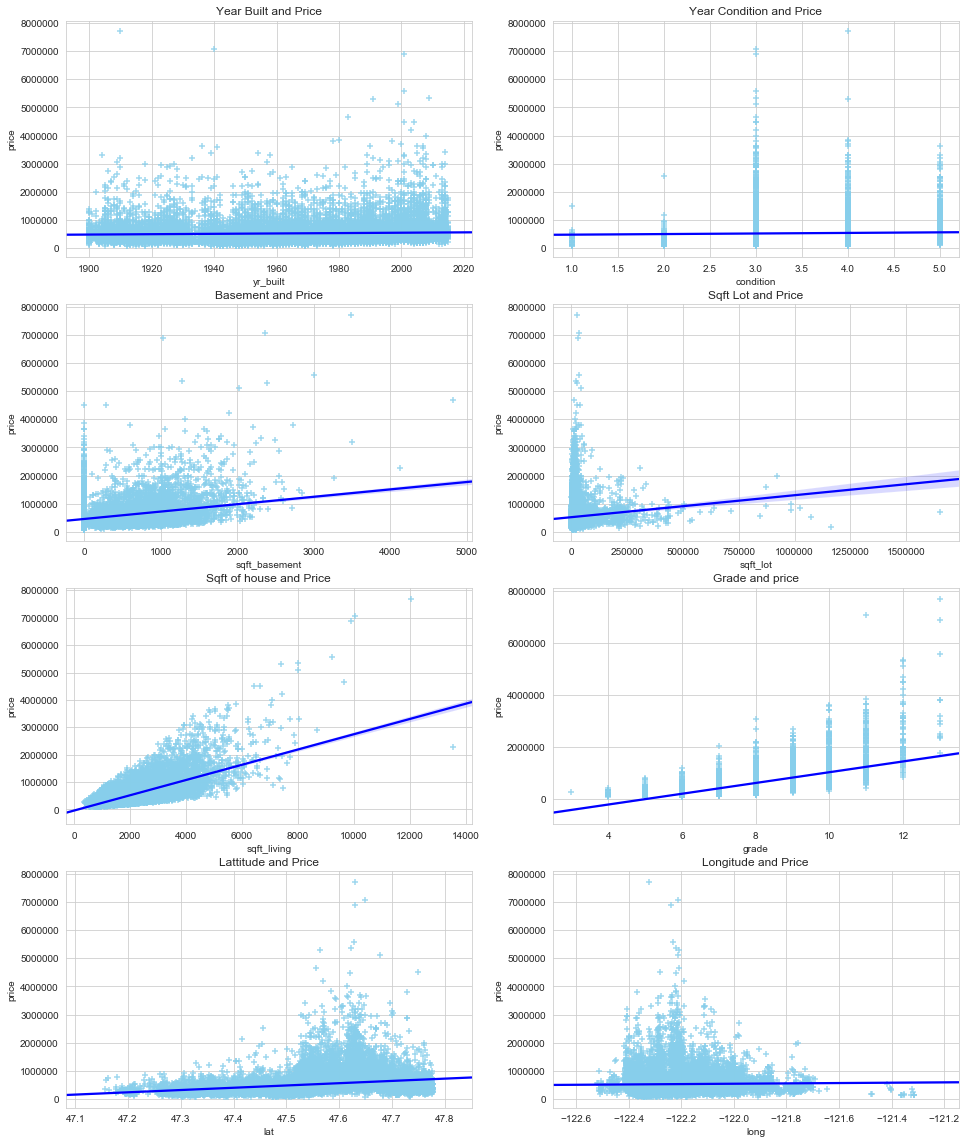

In [165]:
plt.figure(figsize=(16,20))
    
plt.subplot(421)
sns.regplot(df.yr_built, df.price, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'}, marker = '+')
plt.title('Year Built and Price')
plt.subplot(422)
sns.regplot(df.condition, df.price, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'}, marker = '+')
plt.title('Year Condition and Price')
plt.subplot(423)
sns.regplot(df.sqft_basement, df.price, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'}, marker = '+')
plt.title('Basement and Price')
plt.subplot(424)
sns.regplot(df.sqft_lot, df.price, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'}, marker = '+')
plt.title('Sqft Lot and Price')
plt.subplot(425)
sns.regplot(df.sqft_living, df.price, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'}, marker = '+')
plt.title('Sqft of house and Price')
plt.subplot(426)
sns.regplot(df.grade, df.price, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'}, marker = '+')
plt.title('Grade and price')
plt.subplot(427)
sns.regplot(df.lat, df.price, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'}, marker = '+')
plt.title('Lattitude and Price')
plt.subplot(428)
sns.regplot(df.long, df.price, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'}, marker = '+')
plt.title('Longitude and Price')
plt.savefig('regplots1.png')

plt.show()

The fitted line differs from line plots, we can get a better sense of curvature using line plots.

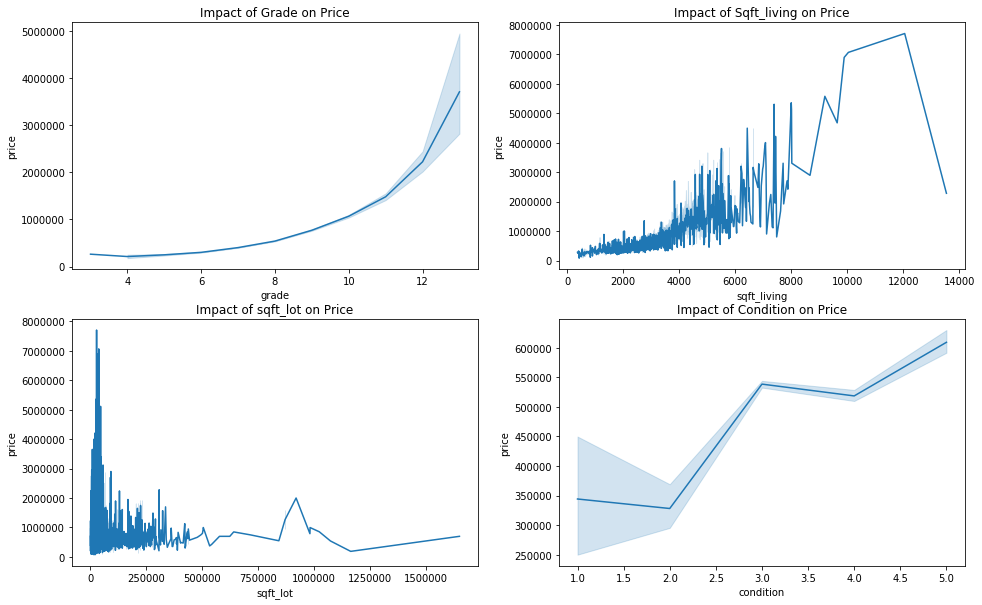

In [14]:
plt.figure(figsize=(16,10))

plt.subplot(221)
sns.lineplot(df.grade, df.price)
plt.title('Impact of Grade on Price')
plt.subplot(222)
sns.lineplot(df.sqft_living, df.price)
plt.title('Impact of Sqft_living on Price')
plt.subplot(223)
sns.lineplot(df.sqft_lot, df.price)
plt.title('Impact of sqft_lot on Price')
plt.subplot(224)
sns.lineplot(df.condition, df.price)
plt.title('Impact of Condition on Price')

plt.savefig('lineplot1.png')
plt.show()

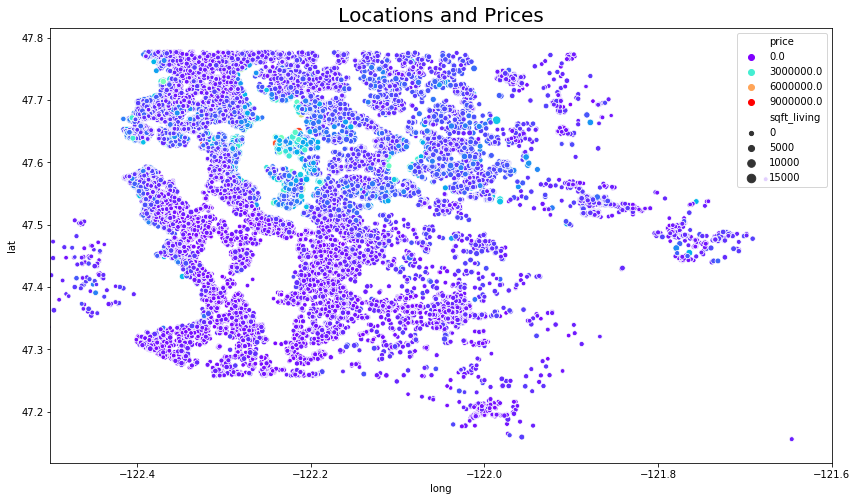

In [144]:
plt.figure(figsize=(14,8))
sns.scatterplot(df.long, df.lat, hue=df.price, size=df.sqft_living, palette='rainbow')
plt.xlim(-122.5, -121.6)
plt.title('Locations and Prices', fontdict={'fontsize': 20})
plt.savefig('maps.png')
plt.show()

In [79]:
df = df.drop('season', axis =1)

#### Getting rid of outliers

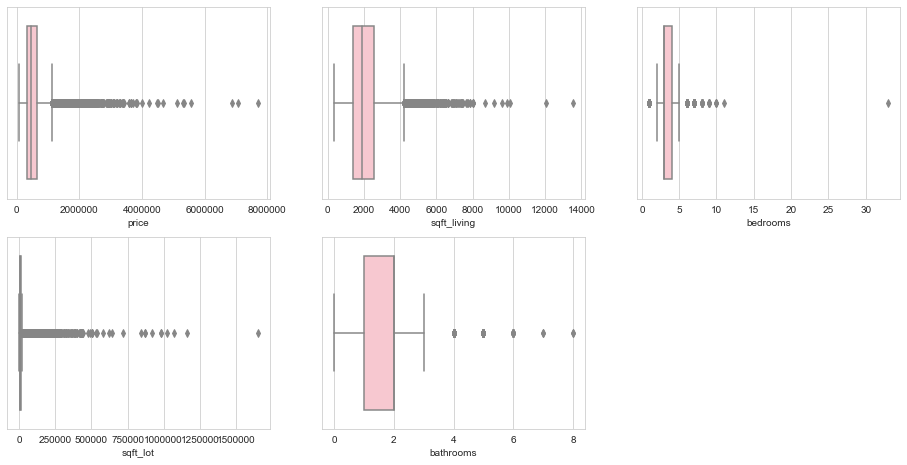

In [27]:
plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df.price, color = 'pink')
plt.subplot(332)
sns.boxplot(df.sqft_living, color = 'pink')
plt.subplot(333)
sns.boxplot(df.bedrooms, color = 'pink')
plt.subplot(334)
sns.boxplot(df.sqft_lot, color = 'pink')
plt.subplot(335)
sns.boxplot(df.bathrooms.astype('int'), color = 'pink')

In [127]:
df = df[df.price < 4000000]
df = df[df.sqft_living < 8000]
df = df[df.sqft_lot < 500000]
df = df[df.bedrooms < 8]
df = df[df.bathrooms < 4]

### Categorical Values
categorical values are values which are not quantitative, such as zipcode, long, lat, year etc.,

In [128]:
segments = 10
bins = list(np.linspace(df.long.min(), df.long.max(), num=segments))
labels = [i for i in range(1,segments)]

df.lat = pd.cut(df.lat, bins, labels=labels)
df.lat = df.lat.astype('category')
lat = pd.get_dummies(df.lat,prefix='lat', drop_first=True)

df.long = pd.cut(df.long, bins, labels=labels)
df.long = df.long.astype('category')
long = pd.get_dummies(df.long,prefix='long', drop_first=True)

# Adding dummies to dataset
df = df.join([lat, long])
df.drop(['lat','long'], axis=1, inplace=True)

We deal yr_renovated as either it has been renovated or not 

In [129]:
bins = [ -1 , 1 , df.yr_renovated.max() ]
labels = ['0','1']

df.yr_renovated = pd.cut(df.yr_renovated, bins, labels=labels)
df.yr_renovated = df.yr_renovated.astype('category')
yr_renovated = pd.get_dummies(df.yr_renovated, prefix='renovated', drop_first=True)
df = df.join([yr_renovated])
df.drop(['yr_renovated'], axis=1, inplace=True)

In [130]:
df.zipcode = df.zipcode.astype('category')
df.yr_built = df.yr_built.astype('category')

zipcode = pd.get_dummies(df.zipcode, prefix='zipcode', drop_first=True)
yr_built = pd.get_dummies(df.yr_built, prefix='yr_built', drop_first=True)

df = df.join([zipcode, yr_built])
df = df.drop(['zipcode', 'yr_built'], axis = 1)

We want sqft_living, sqft_lot and price to be normally distributed.
<br>If they are not normally distributed we perform a log transformation.
<br>Next we want to scale them to have similar range. 

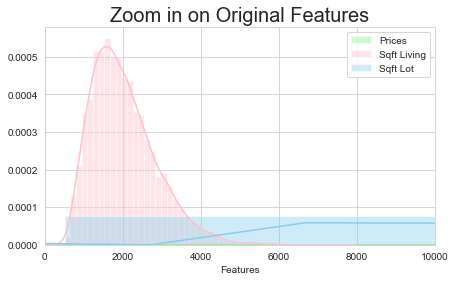

In [50]:
plt.figure(figsize=(7,4))
sns.distplot(df.price, label='Prices', color = 'lightgreen')
sns.distplot(df.sqft_living, label='Sqft Living', color = 'pink')
sns.distplot(df.sqft_lot, label='Sqft Lot', color = 'skyblue')
plt.title('Zoom in on Original Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.xlim(0, 10000)
plt.legend()
plt.show()

In [131]:
df.price = np.log(df.price)
df.sqft_living = np.log(df.sqft_living)
df.sqft_lot = np.log(df.sqft_lot)

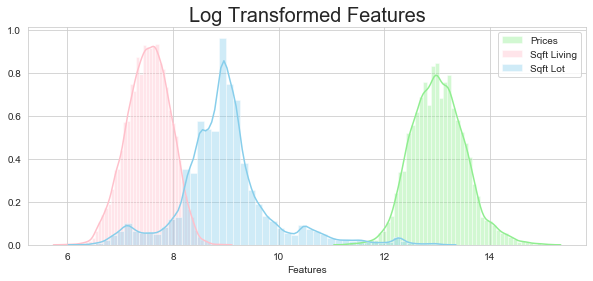

In [52]:
plt.figure(figsize=(10,4))
sns.distplot(df.price, label='Prices', color = 'lightgreen')
sns.distplot(df.sqft_living, label='Sqft Living', color = 'pink')
sns.distplot(df.sqft_lot, label='Sqft Lot', color = 'skyblue')

plt.title('Log Transformed Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

In [132]:
df.price = ( df.price - df.price.min() ) / ( df.price.max() - df.price.min() )
df.sqft_living = ( df.sqft_living - df.sqft_living.min() ) / ( df.sqft_living.max() - df.sqft_living.min())
df.sqft_lot = ( df.sqft_lot - df.sqft_lot.min() ) / ( df.sqft_lot.max() - df.sqft_lot.min())

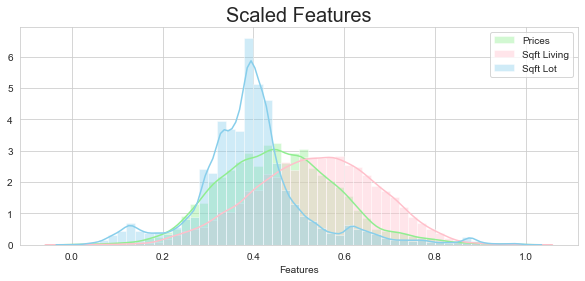

In [54]:
plt.figure(figsize=(10,4))
sns.distplot(df.price, label='Prices', color = 'lightgreen')
sns.distplot(df.sqft_living, label='Sqft Living', color = 'pink')
sns.distplot(df.sqft_lot, label='Sqft Lot', color = 'skyblue')
plt.title('Scaled Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

## Linear Regression
We use three different linear regression models: with our test size = 0.3 and train size = 0.7. Look at py files.
<br>1. Using stats model
<br>2. Using sklearn
<br>We check for optimal independent variables by checking p-values then select 5 variables. Then see how well they meet the required conditions for a linear regression model. Then run the two models again. In ADDITION we will run the columns on our minimodel. <br>
<br>Lastly, we double check using k-folds cross validation. 
<br>Note: We want to see how well our linear regression model predicts prices, hence we do not consider our errors to be the true error which takes into consideration the scalings that we've performed above. 

In [133]:
df = df.drop(['id', 'date'], axis =1)

In [135]:
import mystats as ms

In [39]:
ms.statsModelSummary(df, 'price')

independent variables: Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       ...
       'yr_built_2006', 'yr_built_2007', 'yr_built_2008', 'yr_built_2009',
       'yr_built_2010', 'yr_built_2011', 'yr_built_2012', 'yr_built_2013',
       'yr_built_2014', 'yr_built_2015'],
      dtype='object', length=213)
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     659.2
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        02:31:43   Log-Likelihood:                 32432.
No. Observations:               19284   AIC:                        -6.445e+04
Df Residuals:                   19078   BIC:      

In [40]:
ms.sklearnModelSummary(df, 'price', 0.3)

coefficients:                Coefficient
bedrooms         -0.001295
bathrooms         0.009063
sqft_living       0.315944
sqft_lot          0.146592
floors           -0.008764
...                    ...
yr_built_2011     0.010125
yr_built_2012     0.015199
yr_built_2013     0.019568
yr_built_2014     0.017780
yr_built_2015     0.014854

[213 rows x 1 columns]
R-squared: 0.8701307445772604
adjusted R-squared: 0.868680186034783
Mean Absolute Error (MAE): 0.03316987036371131
Mean Squared Error (MSE): 0.002127259127397595
Root Mean Squared Error (RMSE): 0.04612221945437573


If our p-value is high, even if we have a good R-squared value it may not necessarily mean all variables are good determinants of our independent variable. Hence we take the ones with p-value less than alpha. Choose five and check wether these variables have good conditions for a linear regression model.

In [41]:
selections = ms.selectVariablePValues(df, 'price', 0.05)

In [42]:
ms.selectVariables(df, 5, 'price')

Index(['sqft_living', 'waterfront', 'zipcode_98004', 'zipcode_98039',
       'zipcode_98112'],
      dtype='object')

For these five variables with alpha less than 0.05 we want to check how well they meet required conditions: i.e for each x in of independent variable $X_i$, $i=1,...,k$ we want to see if the distributions of y about x is normal and if all distributions along each x have equal variance. These are very difficult conditions to meet, hence we only check to see if they are "almost" met, meaning they are almost normal and have almost the same variance.  

In [43]:
ms.normality(df, 'sqft_living', 'price')

[(nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, 0.001352285588293635),
 (nan, nan),
 (nan, nan),
 (nan, nan),
 (nan, 0.0014816961412791162),
 (nan, 0.0008481554187148754),
 (nan, nan),
 (nan, nan),
 (-2.314682283000998, 0.01844143506522352),
 (-1.364339135613219, 0.004957697362384871),
 (nan, 0.0014578954455067392),
 (-0.6379956989387502, 0.016640262284563948),
 (0.012720722883383408, 0.024327479874638774),
 (-1.5984870204956765, 0.030041411433319315),
 (-0.3864601885502573, 0.02428808028107425),
 (1.1668164490687314, 0.008150760480997893),
 (0.6466188441778224, 0.00442342535245138),
 (-1.5171825883715695, 0.01687814696336289),
 (-0.21278848464290687, 0.008861967138691236),
 (-0.5169954730763803, 0.014606203804719905),
 (-0.5757862434557293, 0.020467908104322103),
 (-1.0862868893379514, 0.012073900852999614),
 (-0.638100462676052, 0.013310039096880513),
 (-0.5598116657081493, 0.009072828582394029),
 (-0.19509118075789397, 0.01322436825978096),
 (-0.780086014525991, 0.0093534

In [44]:
ms.checkAverage(df,'sqft_living', 'price')

(0.03804753639829764, 0.004904625598625273)

In [45]:
ms.checkRange(df,'sqft_living', 'price')

(4.667604042489478, 0.04132236182739432)

In [46]:
ms.normality(df, 'waterfront', 'price')

[(0.2041384311998794, 0.015902620364281746),
 (0.007474963419621864, 0.027160277193436076)]

In [47]:
ms.normality(df, 'zipcode_98004', 'price')

[(0.23072070833704775, 0.015816468191997297),
 (0.36194652623650314, 0.009708481834735204)]

In [48]:
ms.normality(df, 'zipcode_98039', 'price')

[(0.23997136364470398, 0.016192285669898512),
 (0.08803518417637916, 0.011080895159778652)]

In [49]:
ms.normality(df, 'zipcode_98112', 'price')

[(0.2439174383886368, 0.016009580302377632),
 (0.08720402262766556, 0.014474329511997232)]

## TEST 1

They all have very close to normal with very little difference in variance. The only concern may be with sqft_living which has nan values (because for some x in sqft_living there is not enough values for a skew). The other concern is that sqft_living has some skew as the range of skewness is 4. Lets check our model again. 

In [136]:
new_df = df[ms.selectVariables(df, 5, 'price')]
new_df['price'] = df['price']

/Users/alicekwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
ms.statsModelSummary(new_df, 'price')

independent variables: Index(['sqft_living', 'waterfront', 'zipcode_98004', 'zipcode_98039',
       'zipcode_98112'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     3403.
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        02:32:34   Log-Likelihood:                 18384.
No. Observations:               19284   AIC:                        -3.676e+04
Df Residuals:                   19278   BIC:                        -3.671e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

In [52]:
ms.sklearnModelSummary(new_df, 'price', 0.3)

coefficients:                Coefficient
sqft_living       0.589380
waterfront        0.168954
zipcode_98004     0.184984
zipcode_98039     0.244068
zipcode_98112     0.164211
R-squared: 0.4623477613618271
adjusted R-squared: 0.4622083142618587
Mean Absolute Error (MAE): 0.07710153700785169
Mean Squared Error (MSE): 0.008806746664449888
Root Mean Squared Error (RMSE): 0.0938442681491517


In [53]:
import minimodel as mm

In [54]:
df_train = mm.splitData(new_df, .7)[0]
df_test = mm.splitData(new_df, .7)[1]
X_train = df_train.drop('price', axis =1)
X_test = df_test.drop('price', axis =1)
Y_train = df_train.price
Y_test = df_test.price

In [55]:
X_train_list = []
X_test_list = []
for item in X_train.columns:
    X_train_list.append(list(X_train[item]))
    X_test_list.append(list(X_test[item]))
    
y_train = list(Y_train)
y_test = list(Y_test)    

In [56]:
predictions = mm.predictions(X_train_list, y_train, X_test_list)

In [57]:
mm.errors(predictions, y_test)

MAE: 0.08010122868574819
MSE: 0.009457076437560968
RMSE: 0.09724750093221403


In [58]:
mm.r_squared(predictions, y_test, 5)

R squared: 0.4775146522358975
adujusted R squared: 0.4769702832551056


## TEST 2

Our model is not very good. So we will add all zipcodes, if we get a good model from adding zipcodes it may not tell us which zip code is best but this will tell us that location in general matters.
<br>Again, please refer to py files to understand what the output numbers mean. 

In [25]:
new_df = df[ms.selectVariables(df, 5, 'price')]

In [26]:
new_df['price'] = df['price']

/Users/alicekwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
for item in df.columns:
    if 'zipcode' in item:
        new_df[item] = df[item]

/Users/alicekwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
ms.statsModelSummary(new_df, 'price')

independent variables: Index(['sqft_living', 'waterfront', 'zipcode_98004', 'zipcode_98039',
       'zipcode_98112', 'zipcode_98002', 'zipcode_98003', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98115', 'zipcode_98116',
       

In [62]:
ms.sklearnModelSummary(new_df, 'price', 0.3)

coefficients:                Coefficient
sqft_living       0.549583
waterfront        0.163993
zipcode_98004     0.312527
zipcode_98039     0.375403
zipcode_98112     0.290815
...                    ...
zipcode_98177     0.171778
zipcode_98178     0.031644
zipcode_98188     0.022986
zipcode_98198     0.020920
zipcode_98199     0.235367

[71 rows x 1 columns]
R-squared: 0.8170661731260933
adjusted R-squared: 0.8163901216109961
Mean Absolute Error (MAE): 0.040229650992453125
Mean Squared Error (MSE): 0.0029964571034196527
Root Mean Squared Error (RMSE): 0.054739904123223056


In [63]:
df_train = mm.splitData(new_df, .7)[0]
df_test = mm.splitData(new_df, .7)[1]
X_train = df_train.drop('price', axis =1)
X_test = df_test.drop('price', axis =1)
Y_train = df_train.price
Y_test = df_test.price

In [80]:
X_train_list = []
X_test_list = []
for item in X_train.columns:
    X_train_list.append(list(X_train[item]))
    X_test_list.append(list(X_test[item]))
    
y_train = list(Y_train)
y_test = list(Y_test)  

In [148]:
predictions = mm.predictions(X_train_list, y_train, X_test_list)

In [149]:
mm.errors(predictions, y_test)

MAE: 0.04043366059928411
MSE: 0.0029942112882348753
RMSE: 0.05471938676771584


In [150]:
mm.r_squared(predictions, y_test, len(X_train.columns))

R squared: 0.8192284874853868
adujusted R squared: 0.8169434995223215


Pretty good! Last thing we want to do is run a k-folds cross validation, for k=10

In [151]:
ms.kFoldsCrossValidation(new_df,10, 'price')

,r_2,adjusted_r_2,mae,mse,rmse
0,0.820435,0.819697,0.039361,0.002946,0.054278
1,0.813919,0.813155,0.043122,0.003300,0.057445
2,0.810959,0.810182,0.040714,0.003064,0.055356
3,0.809314,0.808531,0.041974,0.003158,0.056199
4,0.807767,0.806977,0.040366,0.002958,0.054389
5,0.813249,0.812482,0.040639,0.003042,0.055155
6,0.816560,0.815806,0.041250,0.003110,0.055771
7,0.832493,0.831805,0.040650,0.002988,0.054661
8,0.821012,0.820277,0.040765,0.003028,0.055023
9,0.824166,0.823444,0.034829,0.002250,0.047438


In [65]:
ms.kFoldEvaluation(new_df,10, 'price')

(0.8169874190626363,
 0.8162356139566462,
 0.04036700825907677,
 0.002984513735105944,
 0.05457162745654272)

Below shows us test and Train predictions errors, we just want to make sure both errors are similar. 

In [66]:
ms.KfoldsTestTrainAverage(new_df,10, 'price')

(0.0029515241288141075, 0.002984513735105945)

In [67]:
ms.kFoldCVS(new_df,10, 'price')

0.8181182513881942

This shows us that we don't have very different training and testing prediction errors and we get very similar results to the first run of our models. i.e. greater than 80% accuracy. 

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lm = LinearRegression()
X = new_df.drop('price',axis =1)
y = new_df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)
lm.fit(X_train,y_train)
x_pred = lm.predict(X_test)

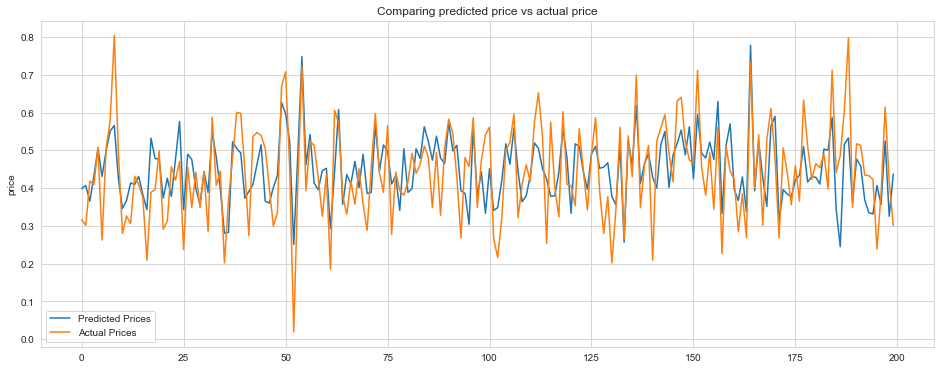

In [138]:
plt.figure(figsize=(16,6))
sns.lineplot(range(len(x_pred[:200])), x_pred[:200], label='Predicted Prices')
sns.lineplot(range(len(y_test[:200])), y_test[:200], label='Actual Prices')
plt.title('Comparing predicted price vs actual price')
plt.savefig('PredictedVActual.png')
plt.show()

We want to make a q-q plot to see how fit our line is.

/Users/alicekwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


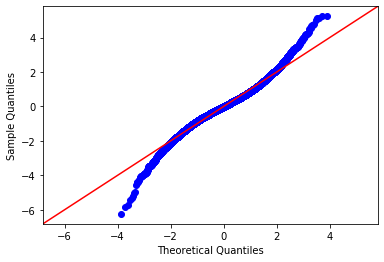

In [39]:
import scipy.stats as stats
import statsmodels.api as sm 

X = new_df.drop('price',axis =1)
y = new_df.price
model = sm.OLS(y,X).fit()
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [54]:
import scipy.stats as stats
f_p_value = []
for item in new_df.columns:
    fvalue, pvalue = stats.f_oneway(new_df[item])
    f_p_value.append((fvalue, pvalue))


# get ANOVA table 
from statsmodels.formula.api import ols
d_melt = pd.melt(new_df.reset_index(), id_vars=['index'], value_vars= new_df.columns)
model = ols('value ~ variable', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
variable,8479.157030,71.0,8539.732878,0.0
Residual,19415.882766,1388376.0,NaN,NaN


In [57]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['variable'], alpha=0.05)
print(m_comp)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
        price   sqft_living   0.0745  0.001  0.0695  0.0795   True
        price    waterfront  -0.4414  0.001 -0.4464 -0.4364   True
        price zipcode_98002  -0.4396  0.001 -0.4446 -0.4346   True
        price zipcode_98003  -0.4358  0.001 -0.4408 -0.4308   True
        price zipcode_98004  -0.4371  0.001 -0.4421 -0.4321   True
        price zipcode_98005  -0.4422  0.001 -0.4472 -0.4372   True
        price zipcode_98006   -0.429  0.001  -0.434  -0.424   True
        price zipcode_98007  -0.4434  0.001 -0.4484 -0.4384   True
        price zipcode_98008  -0.4373  0.001 -0.4423 -0.4323   True
        price zipcode_98010  -0.4442  0.001 -0.4492 -0.4392   True
        price zipcode_98011  -0.4405  0.001 -0.4455 -0.4355   True
        price zipcode_98014  -0.4432  0.001 -0.4482 -0.4382   

The above table tells us that there are pairings of zipcodes and waterfront or zip codes with another zipcode which does not reject the null hypothesis. But for any pairing of zipcode and sqft_living we can reject null hypothesis.

#### Future Work
Perhaps if time had permitted we can go one by one and try to optimize by dropping water front and selecting those zipcode pairings which are False for a better model. 

We want to show top five zip codes so one can invest into these areas. We sort by order of price

In [135]:
list_of_zip = []
for item in new_df.columns:
    if 'zipcode' in item:
        list_of_zip.append((item, new_df.sort_values('price').tail(10)[item].sum()))

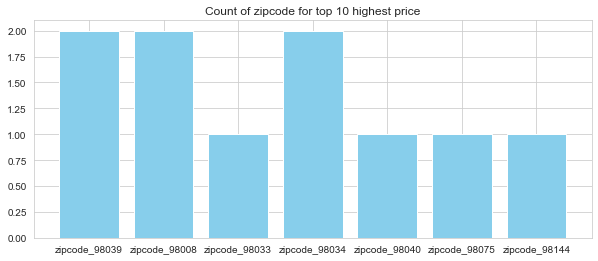

In [137]:
X = []
Y= []
for zipcode,count in list_of_zip:
    if count != 0:
        X.append(str(zipcode))
        Y.append(count)
plt.figure(figsize=(10,4))
plt.bar(X,Y, color = 'skyblue')
plt.title('Count of zipcode for top 10 highest price')
plt.savefig('zipcodeCount.png')

plt.show()

## Test 3

As a last test lets just drop waterfront because its seems to be a bad pairing with many of our zipcode variables. Instead lets replace with grade since it has a decent correlation with price and its not very highly correlated with other variables. 

In [178]:
final_df = df[['price', 'grade', 'sqft_living']]

In [179]:
for item in df.columns:
    if 'zipcode' in item:
        final_df[item] = df[item]

/Users/alicekwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [180]:
ms.statsModelSummary(final_df, 'price')

independent variables: Index(['grade', 'sqft_living', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipc

x_3, x_4, x_22 have bad p-value so we will drop those 

In [182]:
final_df = final_df.drop(['zipcode_98002','zipcode_98003','zipcode_98032' ], axis = 1)

In [183]:
ms.statsModelSummary(final_df, 'price')

independent variables: Index(['grade', 'sqft_living', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipc

In [184]:
ms.sklearnModelSummary(final_df, 'price', 0.3)

coefficients:                Coefficient
grade             0.027420
sqft_living       0.407313
zipcode_98004     0.296217
zipcode_98005     0.205817
zipcode_98006     0.179138
...                    ...
zipcode_98177     0.161409
zipcode_98178     0.045829
zipcode_98188     0.025778
zipcode_98198     0.027279
zipcode_98199     0.223531

[68 rows x 1 columns]
R-squared: 0.8330885213030728
adjusted R-squared: 0.8324978379540542
Mean Absolute Error (MAE): 0.03769829041340141
Mean Squared Error (MSE): 0.0027340109510114053
Root Mean Squared Error (RMSE): 0.052287770568378654


In [187]:
df_train = mm.splitData(final_df, .7)[0]
df_test = mm.splitData(final_df, .7)[1]
X_train = df_train.drop('price', axis =1)
X_test = df_test.drop('price', axis =1)
Y_train = df_train.price
Y_test = df_test.price

In [188]:
X_train_list = []
X_test_list = []
for item in X_train.columns:
    X_train_list.append(list(X_train[item]))
    X_test_list.append(list(X_test[item]))
    
y_train = list(Y_train)
y_test = list(Y_test)  

In [189]:
predictions = mm.predictions(X_train_list, y_train, X_test_list)

In [190]:
mm.errors(predictions, y_test)

MAE: 0.037974023995140875
MSE: 0.0028416069342096176
RMSE: 0.05330672503736857


In [191]:
mm.r_squared(predictions, y_test, len(X_train.columns))

R squared: 0.8258391778263323
adujusted R squared: 0.8237415979631


In [192]:
ms.kFoldsCrossValidation(final_df,10, 'price')

,r_2,adjusted_r_2,mae,mse,rmse
0,0.823891,0.823198,0.037428,0.002889,0.053753
1,0.827083,0.826403,0.040251,0.003066,0.055376
2,0.831054,0.830389,0.037825,0.002739,0.052332
3,0.828066,0.827389,0.039246,0.002848,0.053364
4,0.822692,0.821994,0.038144,0.002729,0.052235
5,0.831715,0.831053,0.037650,0.002741,0.052357
6,0.834721,0.834070,0.038717,0.002802,0.052938
7,0.841114,0.840489,0.038551,0.002834,0.053236
8,0.829988,0.829320,0.038305,0.002876,0.053626
9,0.809943,0.809195,0.036131,0.002432,0.049320


In [193]:
ms.KfoldsTestTrainAverage(final_df,10, 'price')

(0.002750764917632196, 0.002795671662876475)

In [194]:
ms.kFoldCVS(final_df,10, 'price')

0.8304990358976093

Our model improved by 2% 

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lm = LinearRegression()
X = final_df.drop('price',axis =1)
y = final_df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)
lm.fit(X_train,y_train)
x_pred = lm.predict(X_test)

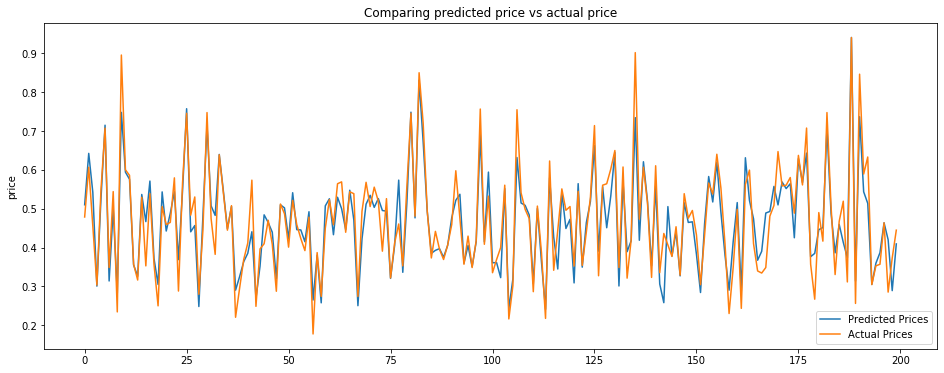

In [196]:
plt.figure(figsize=(16,6))
sns.lineplot(range(len(x_pred[:200])), x_pred[:200], label='Predicted Prices')
sns.lineplot(range(len(y_test[:200])), y_test[:200], label='Actual Prices')
plt.title('Comparing predicted price vs actual price')
plt.savefig('PredictedVActual.png')
plt.show()

Lets try to see which grade is best for a good house

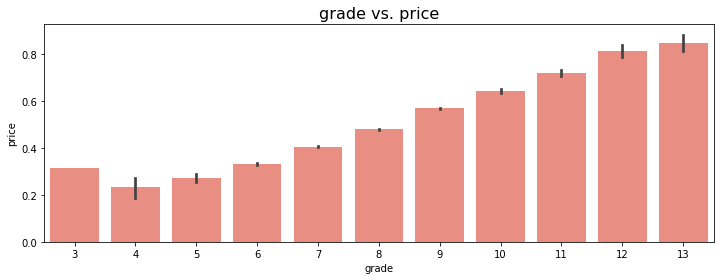

In [199]:
plt.figure(figsize=(12,4))
sns.barplot(x = 'grade', y ='price', data = final_df, color = 'salmon')
plt.title('grade vs. price', fontdict={'fontsize': 16})
plt.savefig('gradeVprice.png')
plt.show()

The better the grade the higher the price. But look! there is a grade of 3 which also has good price, equivalent to 6 so we can recommend that for those looking for a cheaper house but better option can buy a house of grade 6 at the same price as those of grade 3. 

## Conclusion

Business recommendation: Location, grade and house size determines price values very well, hence if you are on the buying end it would be wise to invest into a home that has more square footage even if the number of bathrooms and bedrooms remain the same and popular location, zipcodes:98039, 98008, 98033, 98034, 98040, 98075, 98144. If you are planning to sell your home after the investment it would be a good time to sell in the Spring around May (which indicates you should begin advertisement in March). If purchasing a house we would recommend getting grade 6 or higher.  